# Assignment 17 - Support Vector Machines (Forest Fire)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
data.shape

(517, 31)

In [4]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

### Dropping Unwanted Features/Columns

In [5]:
data = data.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'], axis=1)

data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [6]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [8]:
data.describe(include='all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
count,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517
unique,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
freq,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378
mean,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,NaN
std,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,NaN
min,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,NaN
25%,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,NaN
50%,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,NaN
75%,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,NaN


### Visualisation

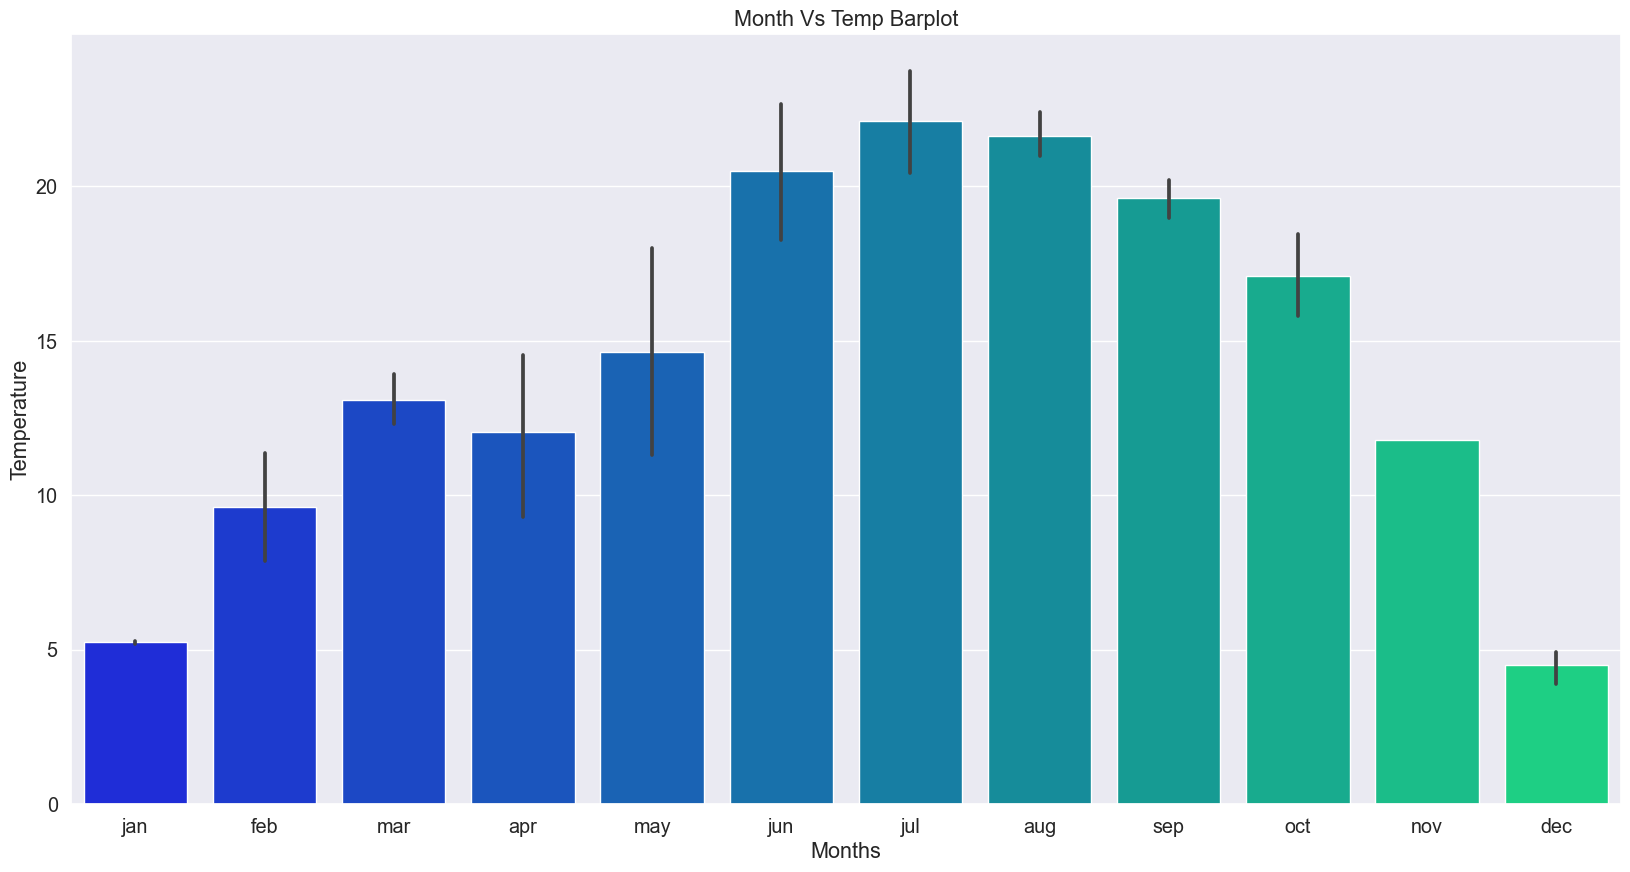

In [9]:
plt.rcParams['figure.figsize'] = [20, 10]
snb.set(style = "darkgrid", font_scale = 1.3)
month_temp = snb.barplot(x = 'month', y = 'temp', data = data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature")

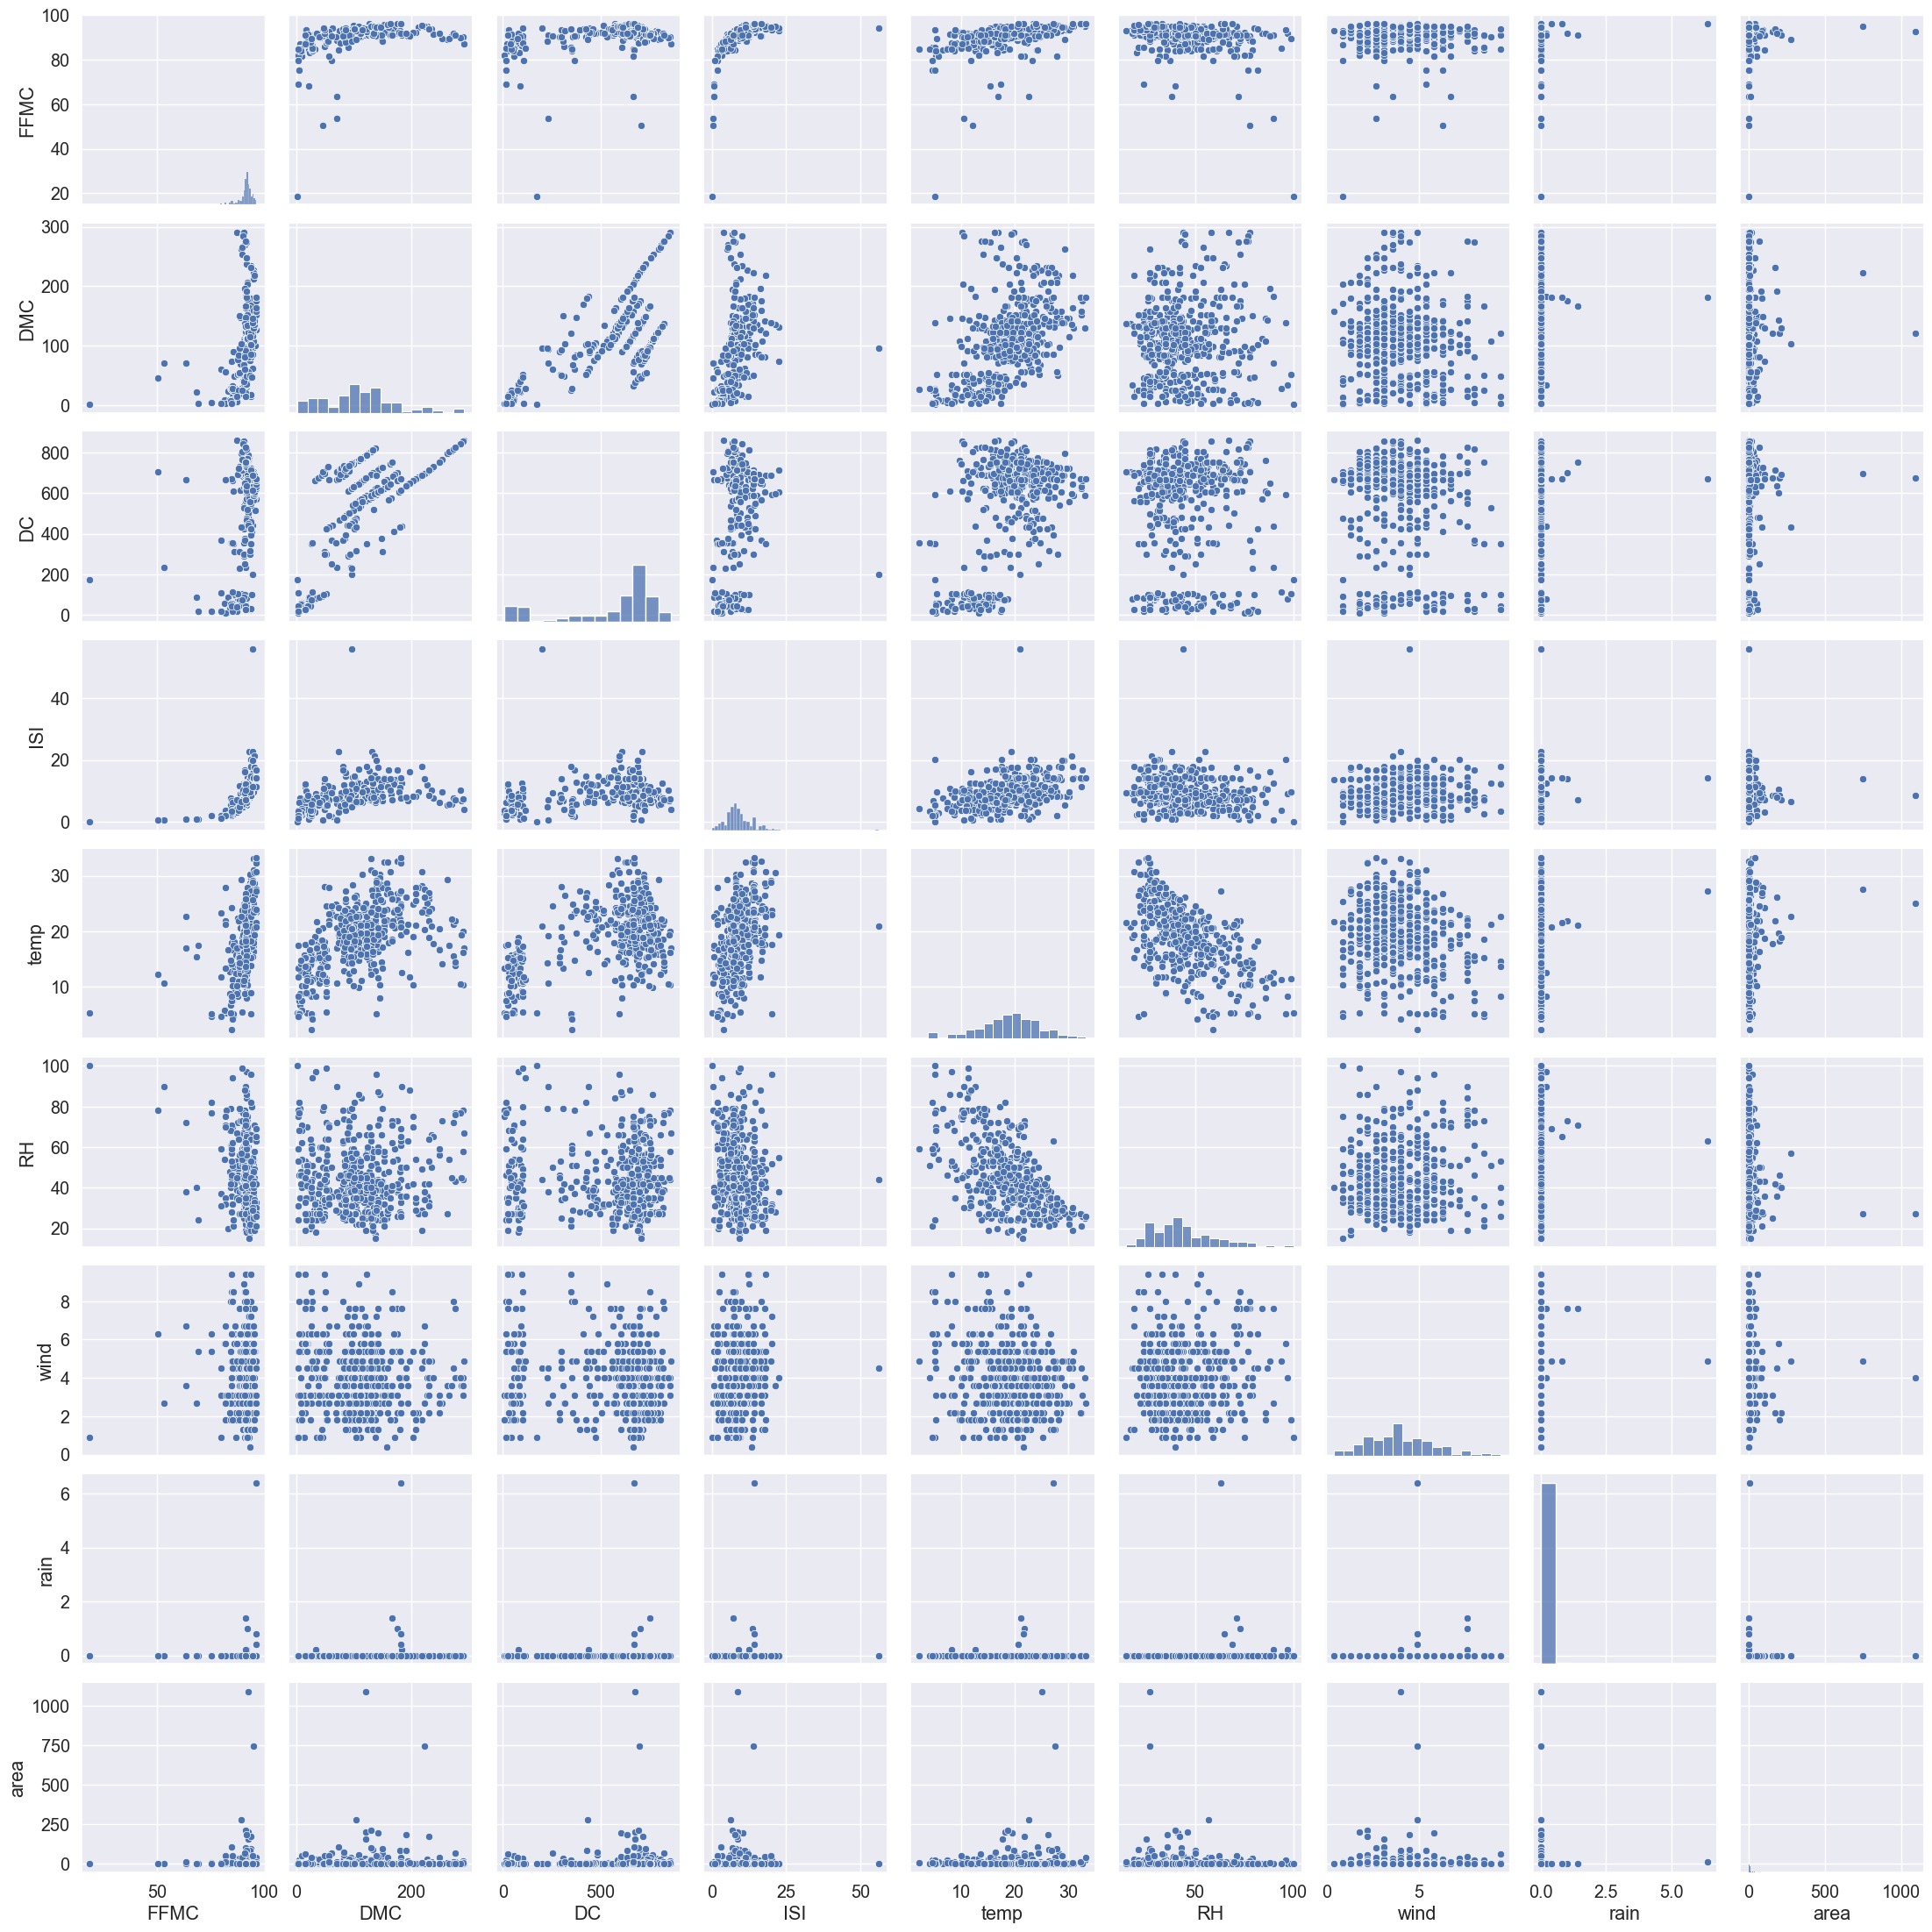

In [10]:
snb.pairplot(data)

<Axes: xlabel='size_category', ylabel='count'>

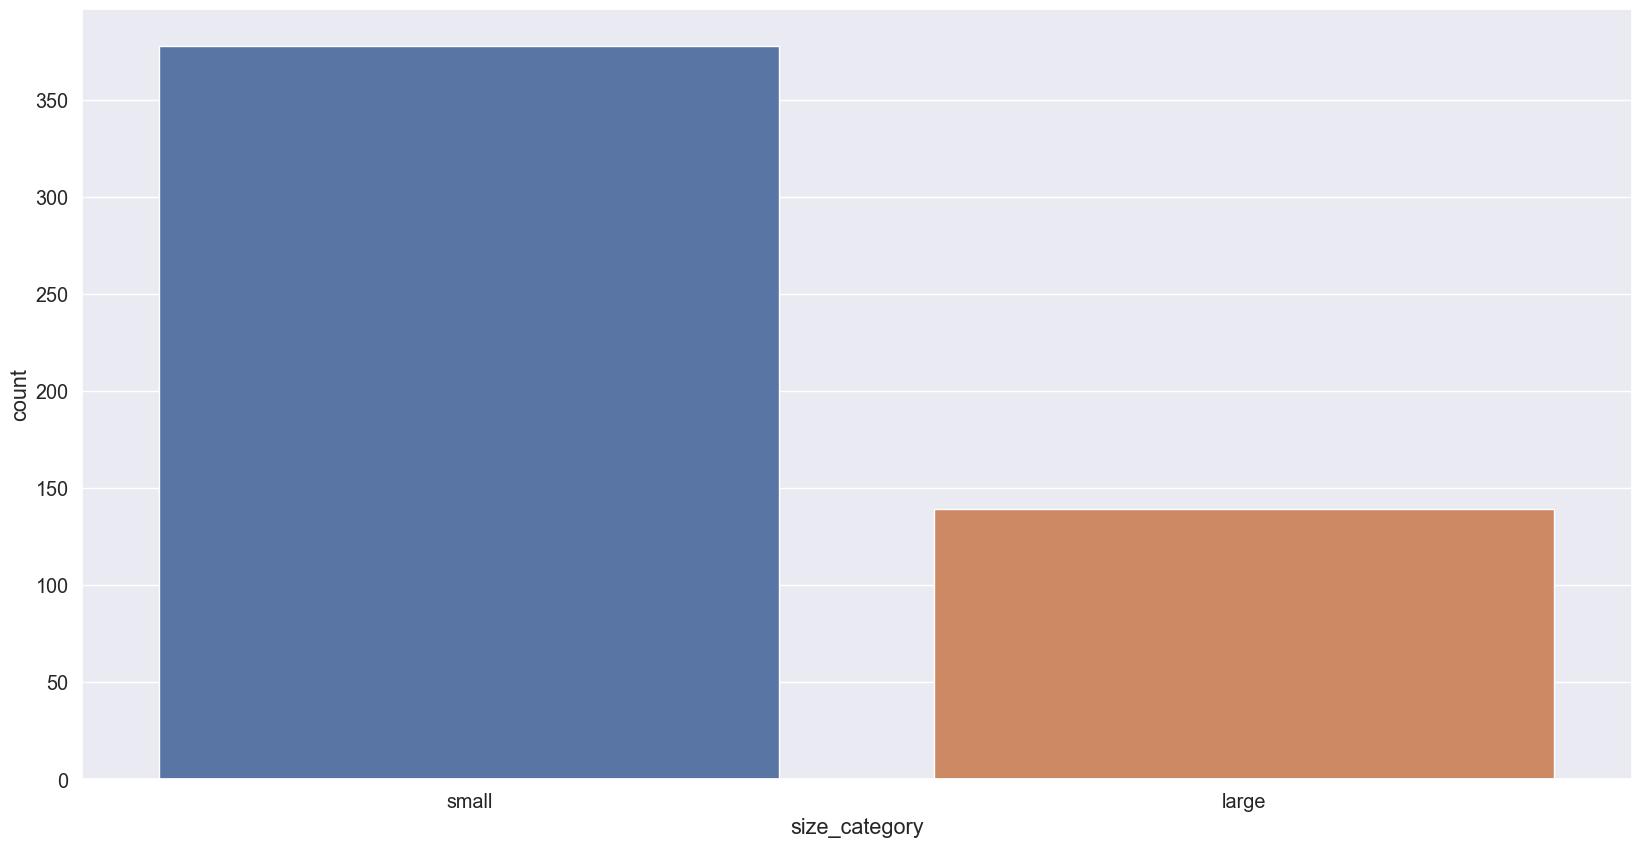

In [11]:
snb.countplot(x = 'size_category', data = data)

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

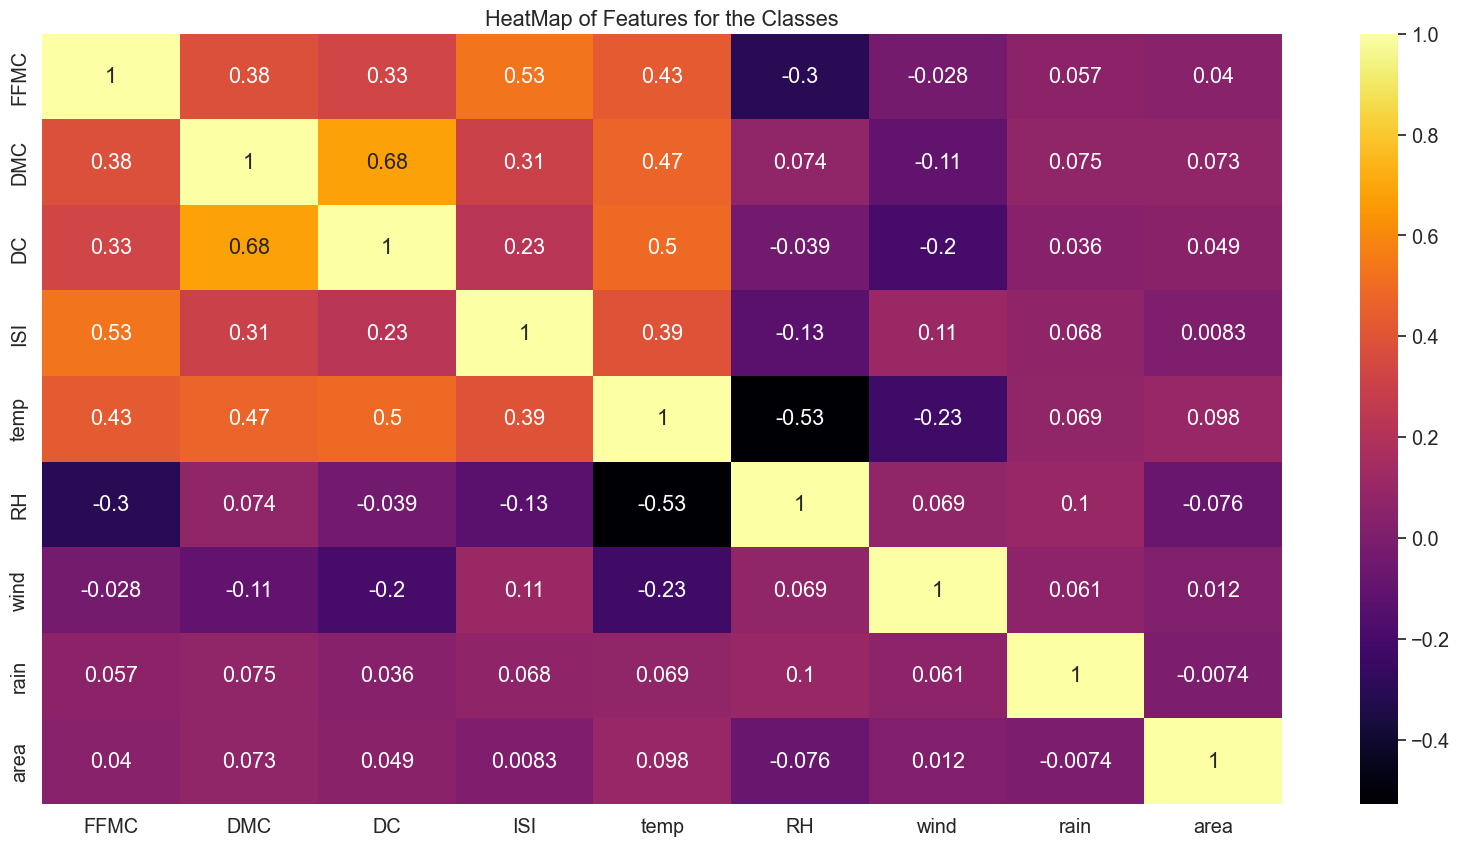

In [12]:
snb.heatmap(data.corr(), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

In [13]:
data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'), (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(data.drop('size_category',axis=1))

StandardScaler()

In [17]:
scaled_features = scaler.transform(data.drop('size_category',axis=1))
scaled_features

array([[-1.96844301,  0.35772091, -0.80595947, ...,  1.49861442,
        -0.07326831, -0.20201979],
       [ 1.1101202 , -1.09090867, -0.00810203, ..., -1.74175564,
        -0.07326831, -0.20201979],
       [ 1.1101202 ,  0.84059743, -0.00810203, ..., -1.51828184,
        -0.07326831, -0.20201979],
       ...,
       [ 0.23053071,  1.32347396, -1.64008316, ...,  1.49861442,
        -0.07326831, -0.02653216],
       [ 0.23053071,  0.84059743,  0.68095666, ..., -0.00983371,
        -0.07326831, -0.20201979],
       [ 1.54991494, -1.09090867, -2.02087875, ...,  0.26950853,
        -0.07326831, -0.20201979]])

### Visualising Transformed/Scaled Data

In [18]:
new_data = pd.DataFrame(scaled_features,columns=data.columns[:-1])
new_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


<Axes: ylabel='Density'>

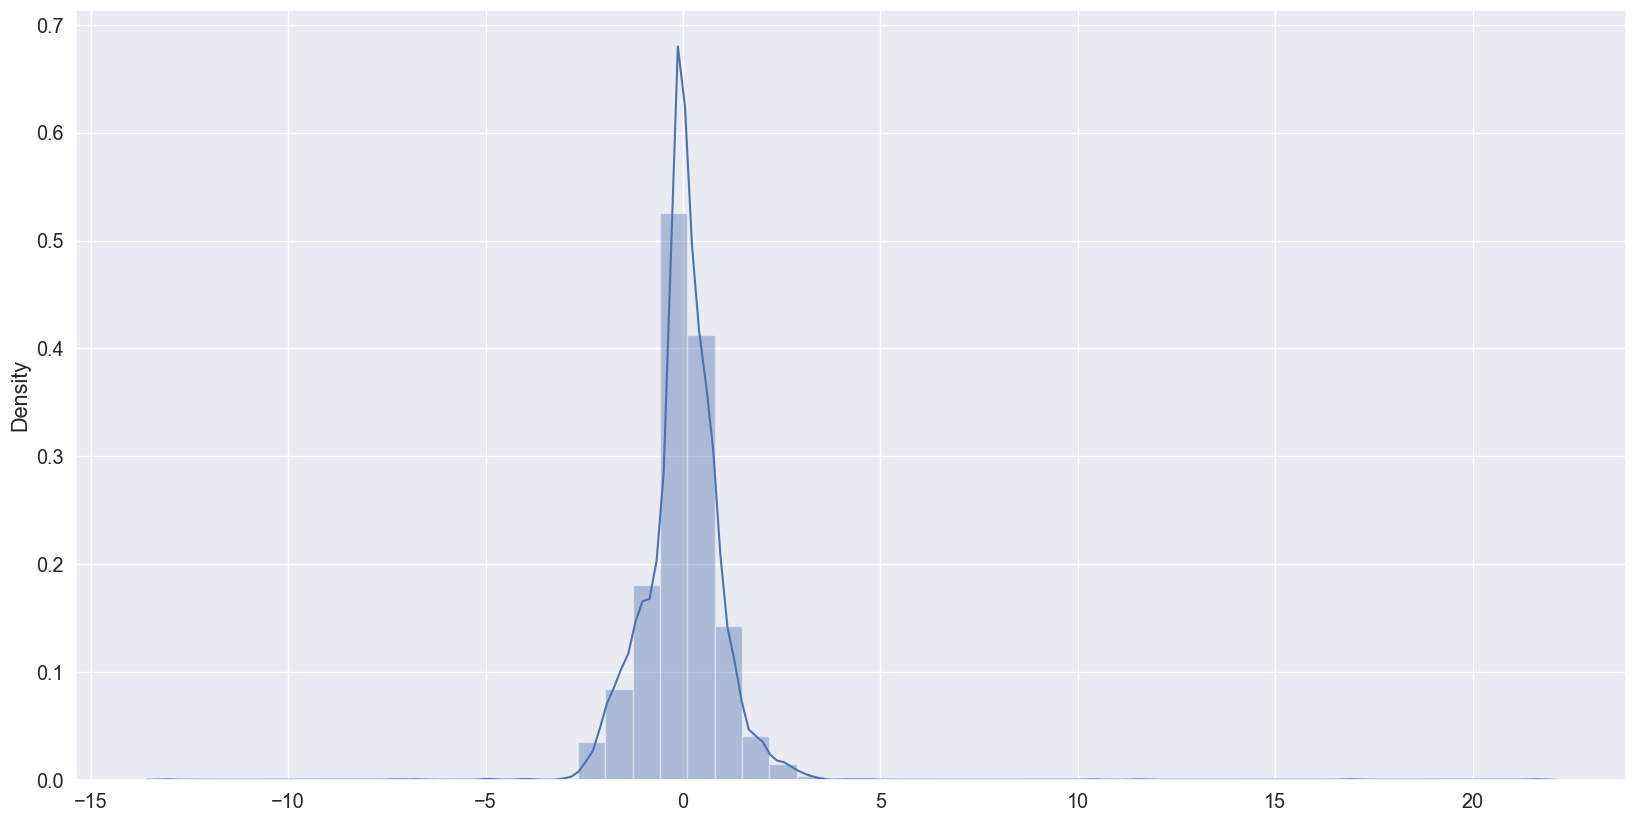

In [19]:
snb.distplot(new_data)

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

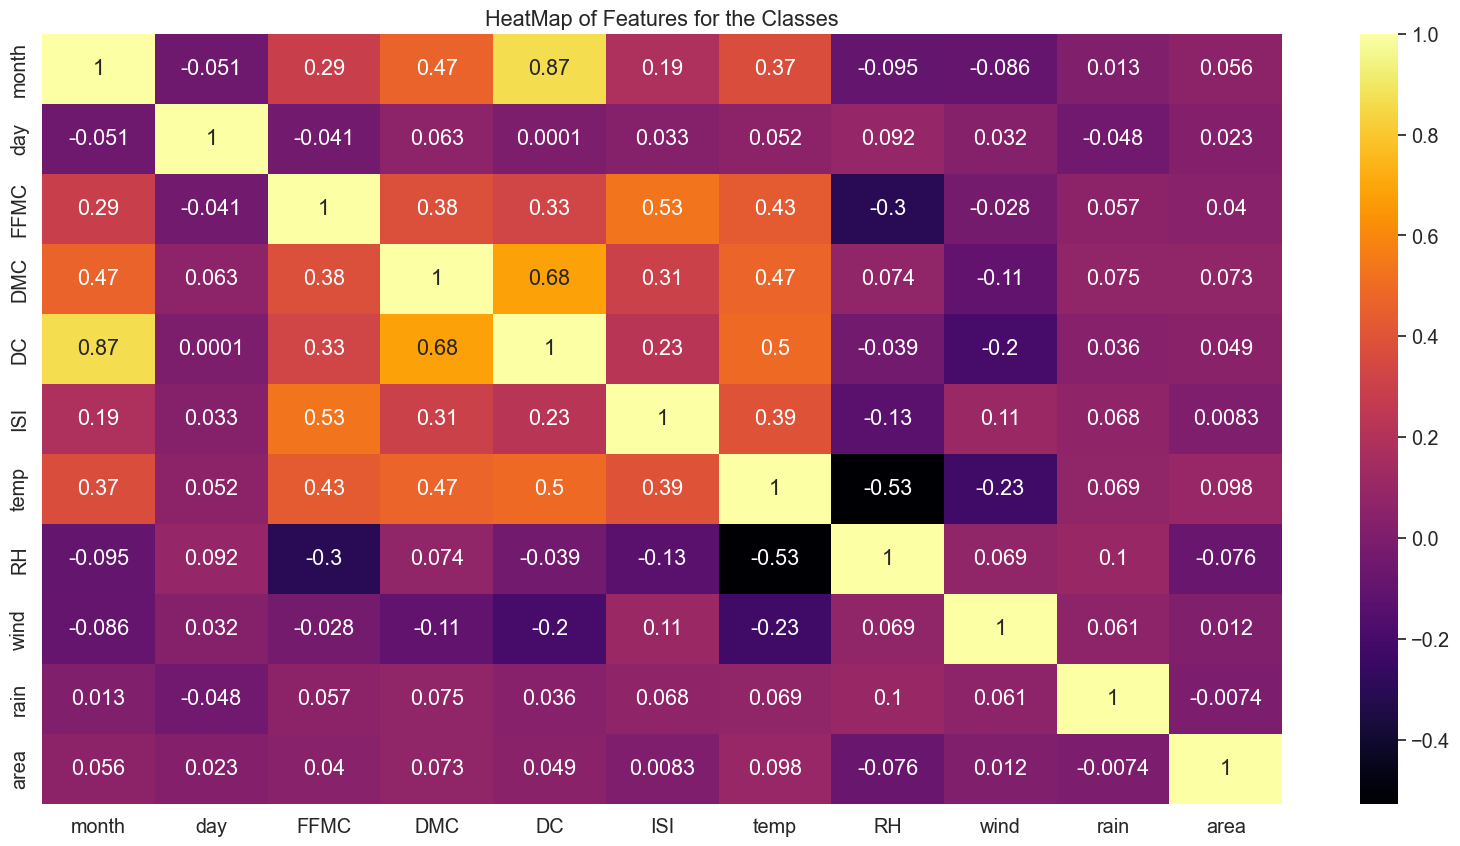

In [20]:
snb.heatmap(new_data.corr(), annot=True, cmap="inferno")
ax1 = plt.gca()
ax1.set_title("HeatMap of Features for the Classes")

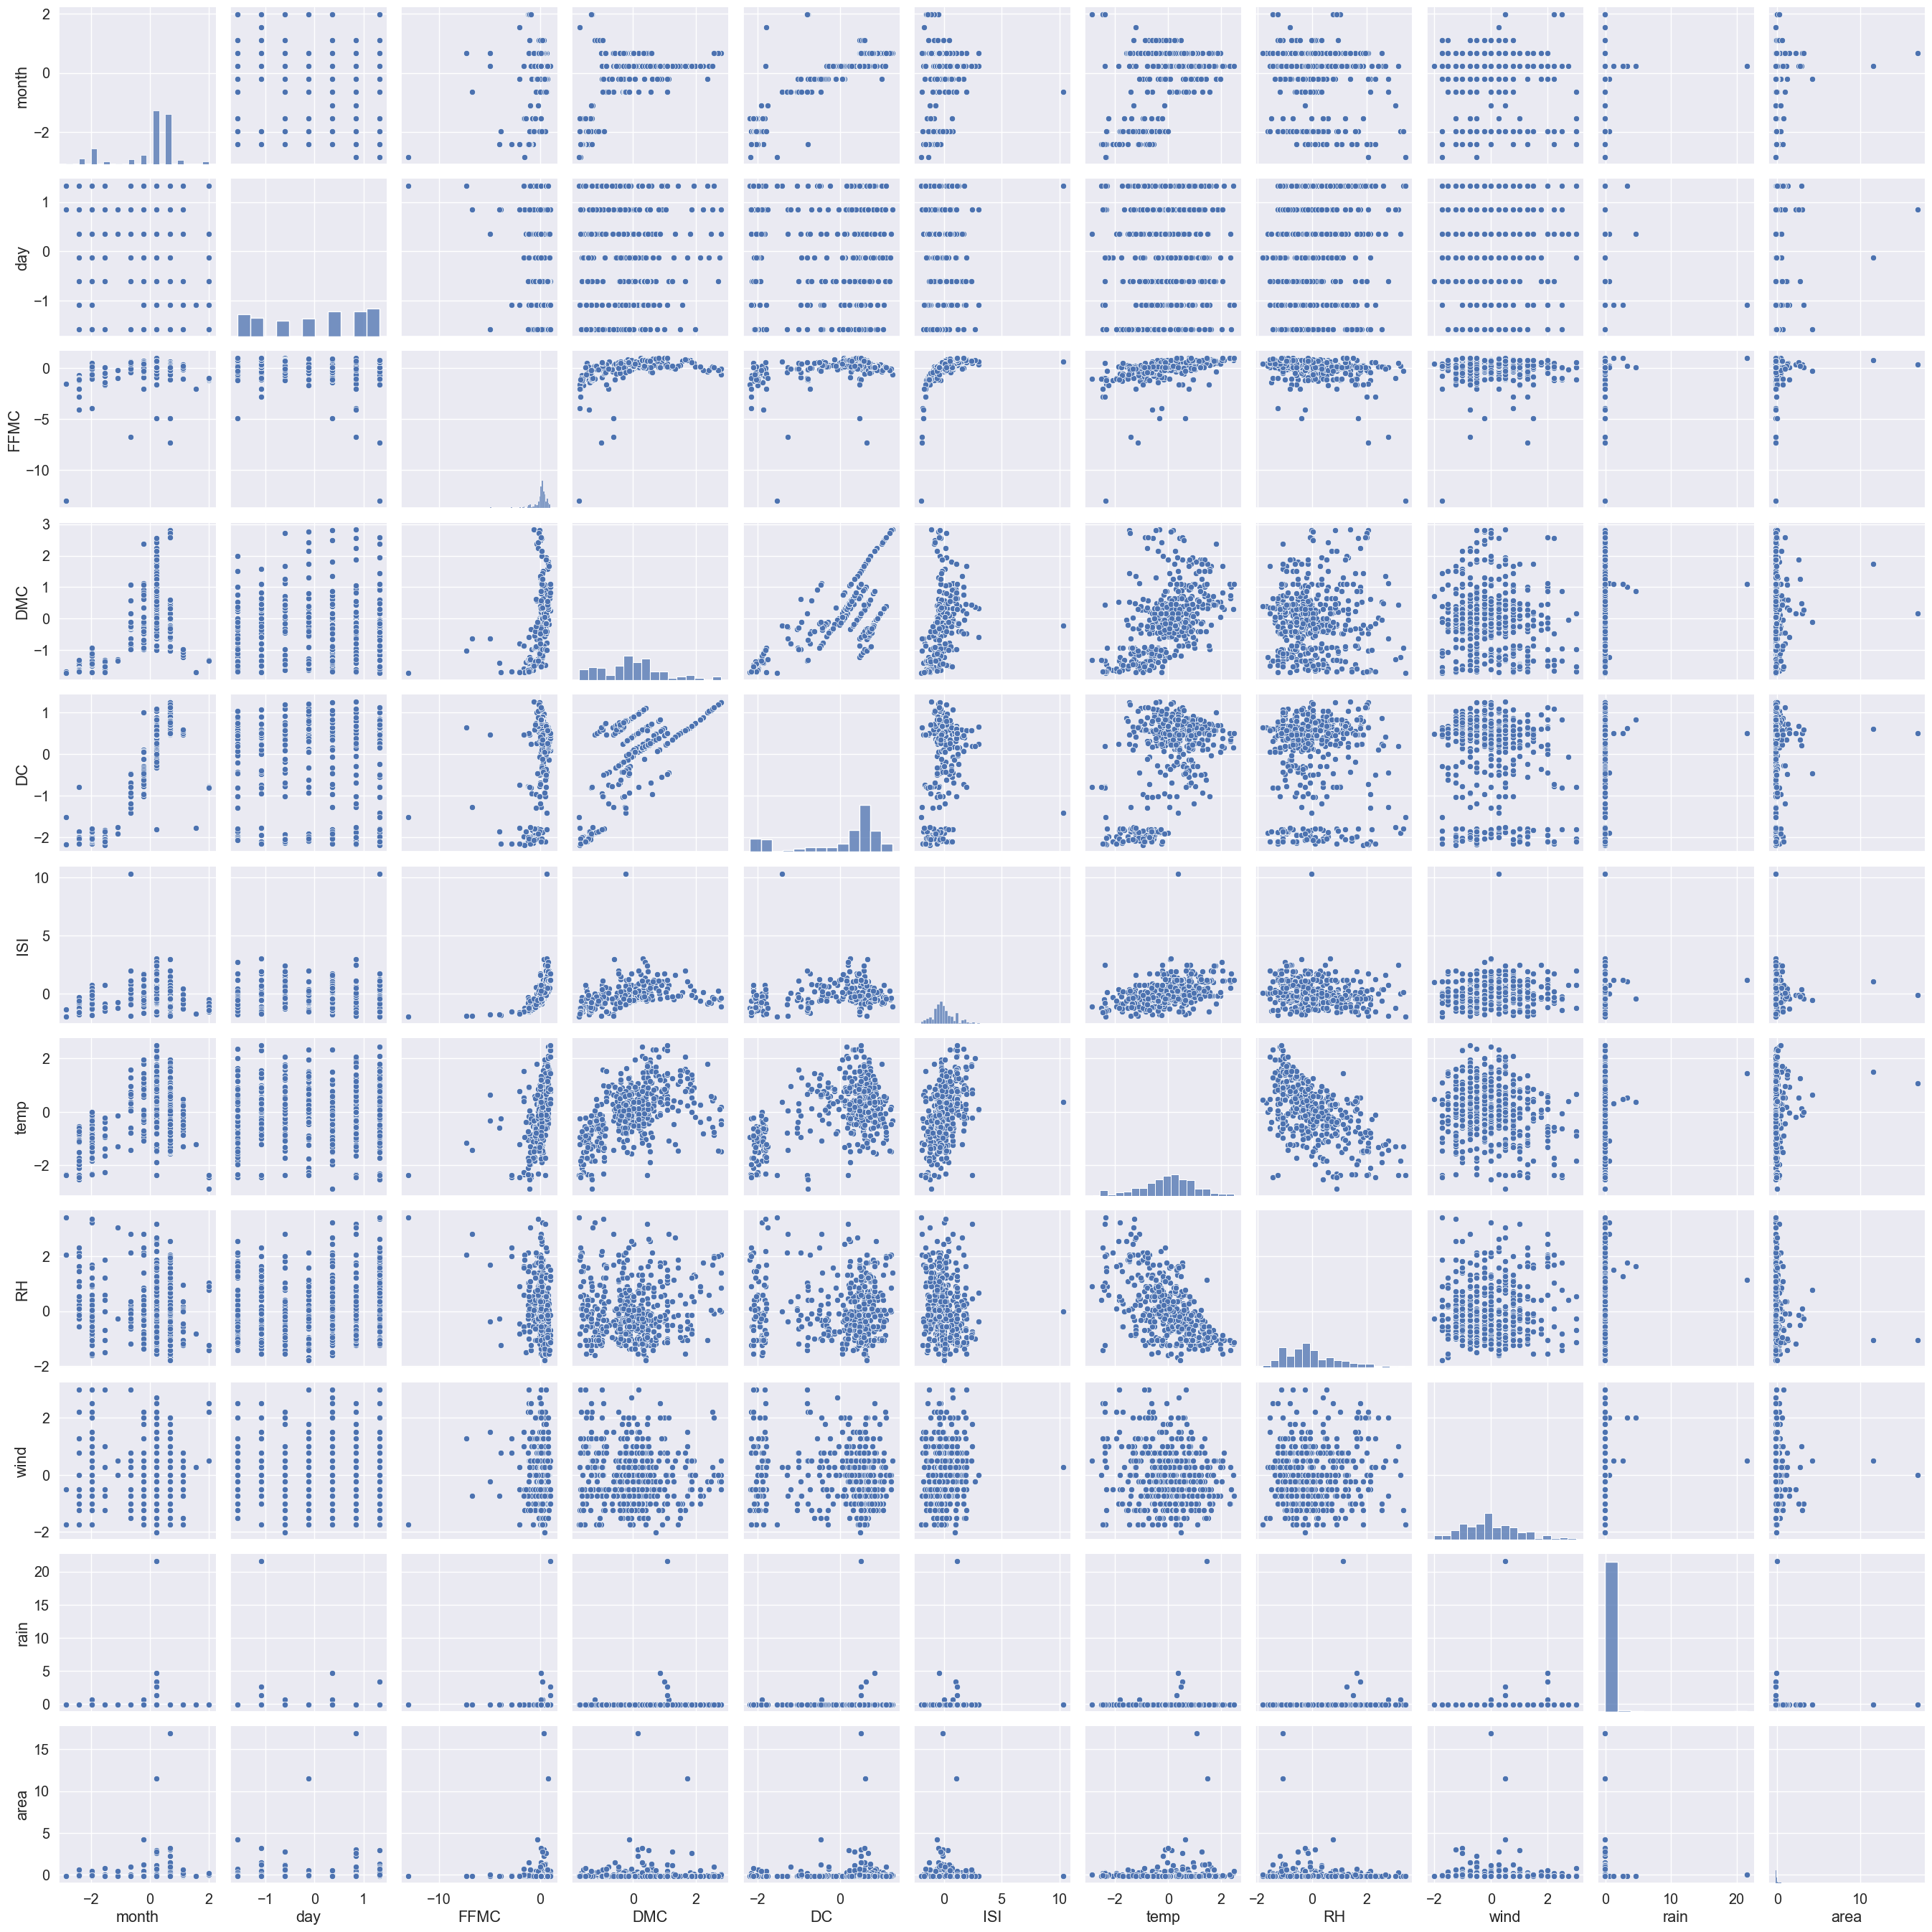

In [21]:
snb.pairplot(new_data)

In [22]:
features = new_data
features

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [23]:
target = data['size_category']
target

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

### Performing Train Test Split & Building Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [25]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.75, random_state=40)

In [26]:
svc = SVC()

In [27]:
svc.fit(x_train, y_train)

SVC()

In [28]:
pred = svc.predict(x_test)

In [29]:
accuracy_score(y_test, pred)

0.823076923076923

In [30]:
confusion_matrix(y_test, pred)

array([[ 8, 22],
       [ 1, 99]], dtype=int64)

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       large       0.89      0.27      0.41        30
       small       0.82      0.99      0.90       100

    accuracy                           0.82       130
   macro avg       0.85      0.63      0.65       130
weighted avg       0.83      0.82      0.78       130



### Building Model with Hyperparameter ('kernel=rbf')

In [32]:
model = SVC(kernel='rbf',gamma=15, C=1)

In [33]:
model.fit(x_train, y_train)

SVC(C=1, gamma=15)

In [34]:
param_pred = model.predict(x_test)

In [35]:
accuracy_score(y_test, pred)

0.823076923076923

In [36]:
confusion_matrix(y_test, pred)

array([[ 8, 22],
       [ 1, 99]], dtype=int64)

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       large       0.89      0.27      0.41        30
       small       0.82      0.99      0.90       100

    accuracy                           0.82       130
   macro avg       0.85      0.63      0.65       130
weighted avg       0.83      0.82      0.78       130



### Model with Grid Search CV

In [38]:
clf = SVC()

In [39]:
grid_param = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]

In [40]:
gsv = GridSearchCV(clf,grid_param,cv=10)

In [41]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}])

In [42]:
accuracy_score(y_test, pred)

0.823076923076923

In [43]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'linear'}, 0.9819838056680161)

### Building Model with the above Params

In [44]:
param_model = SVC(C= 15, gamma = 50, kernel = 'linear')

In [45]:
param_model.fit(x_train, y_train)

SVC(C=15, gamma=50, kernel='linear')

In [46]:
param_pred = param_model.predict(x_test)

In [47]:
accuracy_score(y_test, param_pred)

0.9769230769230769

In [48]:
confusion_matrix(y_test, param_pred)

array([[30,  0],
       [ 3, 97]], dtype=int64)

In [49]:
print(classification_report(y_test, param_pred))

              precision    recall  f1-score   support

       large       0.91      1.00      0.95        30
       small       1.00      0.97      0.98       100

    accuracy                           0.98       130
   macro avg       0.95      0.98      0.97       130
weighted avg       0.98      0.98      0.98       130

